In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

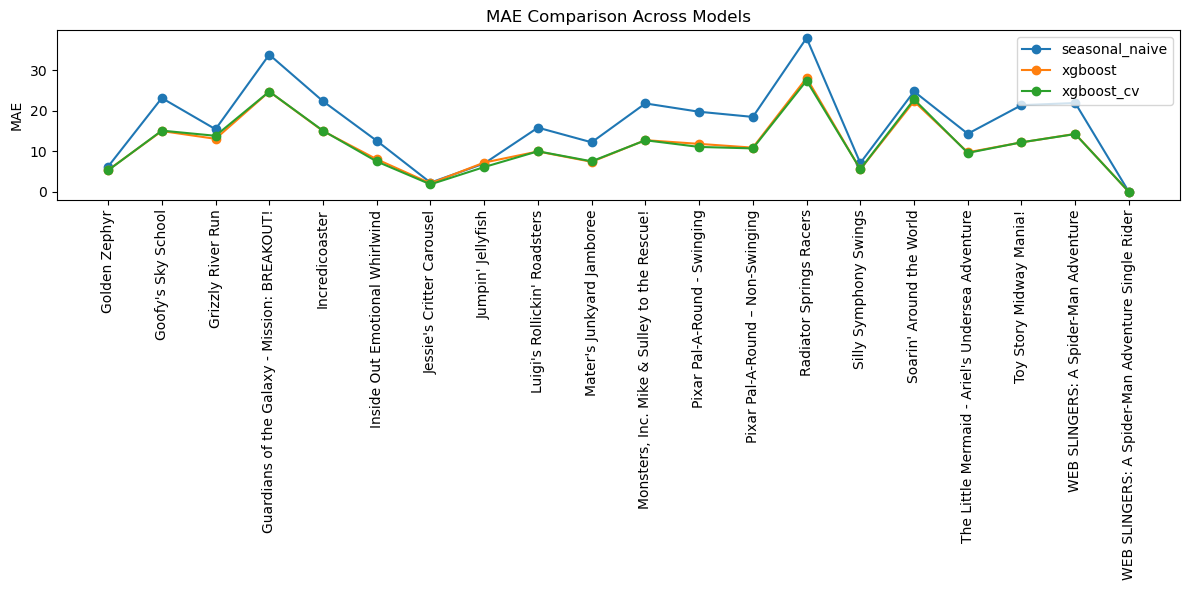

Ride Name                                         | Seasonal Naive | XGBoost | XGBoost_CV | Percentage Increase
---------------------------------------------------------------------------------------------------------------
Golden Zephyr                                     |           6.26 |    5.39 |       5.33 |               -14.8%
Goofy's Sky School                                |          23.17 |   15.02 |      15.13 |               -34.7%
Grizzly River Run                                 |          15.47 |   13.10 |      13.85 |               -10.5%
Guardians of the Galaxy - Mission: BREAKOUT!      |          33.87 |   24.75 |      24.77 |               -26.9%
Incredicoaster                                    |          22.38 |   15.02 |      15.11 |               -32.5%
Inside Out Emotional Whirlwind                    |          12.62 |    8.06 |       7.52 |               -40.4%
Jessie's Critter Carousel                         |           2.30 |    2.13 |       1.88 |       

In [ ]:
# read csv files
sn_df = pd.read_csv("../data/results/baseline_mae.csv")
xgb_df = pd.read_csv("../data/results/xgb_results.csv")
xgb_cv_df = pd.read_csv("../data/results/xgb_cv_results.csv")

# Combine
df_all = pd.concat([sn_df, xgb_df, xgb_cv_df], ignore_index=True)

# Sort by ride name for cleaner plotting
df_all.sort_values(by="ride_name", inplace=True)

# Create the plot
plt.figure(figsize=(12, 6))

for model_name, df_model in df_all.groupby("model"):
    plt.plot(df_model["ride_name"], df_model["mae"], marker='o', label=model_name)

plt.xticks(rotation=90)
plt.ylabel("MAE")
plt.title("MAE Comparison Across Models")
plt.legend()
plt.tight_layout()
plt.show()

# Pivot the combined dataframe into a wide format:
# ride_name | seasonal_naive | xgboost | xgboost_cv
table = df_all.pivot(index="ride_name", columns="model", values="mae").reset_index()

# Rename columns to your preferred names
table = table.rename(columns={
    "seasonal_naive": "Seasonal Naive",
    "xgboost": "XGBoost",
    "xgboost_cv": "XGBoost_CV"
})

# Compute Percentage Increase = (XGBoost_CV - Seasonal Naive) / Seasonal Naive * 100
table["Percentage Increase"] = (table["XGBoost_CV"] - table["Seasonal Naive"]) / table["Seasonal Naive"] * 100

# Determine column widths for formatting
col1 = max(len("Ride Name"), table["ride_name"].str.len().max())
col2 = len("Seasonal Naive")
col3 = len("XGBoost")
col4 = len("XGBoost_CV")
col5 = len("Percentage Increase")

# Print header
header = (
    f"{'Ride Name':<{col1}} | "
    f"{'Seasonal Naive':>{col2}} | "
    f"{'XGBoost':>{col3}} | "
    f"{'XGBoost_CV':>{col4}} | "
    f"{'Percentage Increase':>{col5}}"
)
print(header)
print("-" * len(header))

# Print each row
for _, row in table.iterrows():
    print(
        f"{row['ride_name']:<{col1}} | "
        f"{row['Seasonal Naive']:{col2}.2f} | "
        f"{row['XGBoost']:{col3}.2f} | "
        f"{row['XGBoost_CV']:{col4}.2f} | "
        f"{row['Percentage Increase']:{col5}.1f}%"
    )
